# Using odeint to solve Mean, Variance, Information Rate, Information Length
The following part is the other approach, which is [numerically approach], to solve the Mean, Variance, Information Rate, and Information length using [odeint] function. 

To using the function, the equations for $\partial_t \left< x \right>$ and $\partial_t \beta$ / $\partial_t \sigma$ are needed. 

*Reader may refer to <a href= https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html> this</a> for some example. In conjunction, reader may refer to <a href=https://tutorial.math.lamar.edu/classes/de/Linear.aspx> Paul's Online Notes</a> for a quick mathematics understanding. 

In this situation, the [rate of mean] $\partial_t \left< x \right> = -\gamma \left< x \right>$, the [rate of beta] $\partial_t \beta = 2\beta\gamma - 4D\beta^2$, and the [rate of standard deviation] $\partial_t \sigma = \frac{D}{\sigma} - \sigma\gamma$

<b> NOTE: </b> The gap of the time step needs to be as small as possible as [numerical method] heavily relies on it. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint, quad, cumulative_trapezoid
from scipy.misc import derivative 

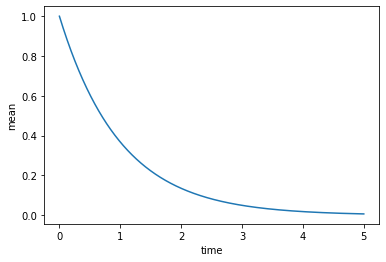

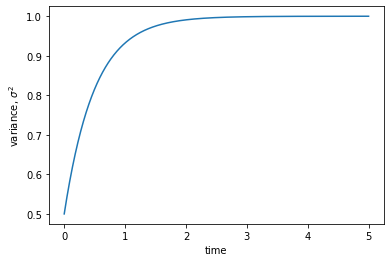

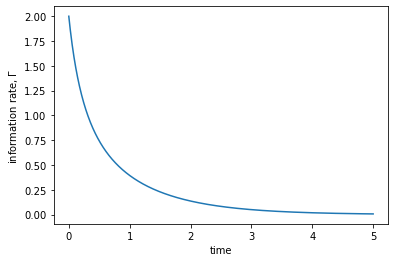

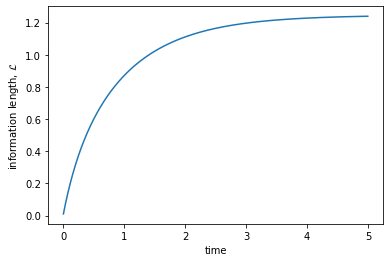

In [18]:
def mean(x, t):
    dxdt = -g*x
    return dxdt

def std(s, t):
    dsdt = D/s - s*g
    return dsdt

def beta(b, t):
    dbdt = 2*b*g - 4*D*b**2
    return dbdt

t = np.linspace(0,5,1000)

#initial parameter
x0=1
s0=np.sqrt(0.5)
b0=1
g=1
D=1

m = odeint(mean, x0, t) #mean
s = odeint(std, s0, t) #standard deviation 

va = s**2

r = np.sqrt((2*std(s,t)**2 + mean(m,t)**2)/(va)) #information rate
r = r.reshape(len(t))
l = cumulative_trapezoid(r,t)


plt.plot(t, m)
plt.xlabel('time')
plt.ylabel('mean')
plt.show()

plt.plot(t, va)
plt.xlabel('time')
plt.ylabel('variance, $\sigma^2$')
plt.show()

plt.plot(t, r)
plt.xlabel('time')
plt.ylabel('information rate, $\Gamma$')
plt.show()

plt.plot(t[0:len(t)-1], l)
plt.xlabel('time')
plt.ylabel('information length, $\mathcal{L}$')
plt.show()

The following section is the comparison of [analytic solution] and [numerical solution].

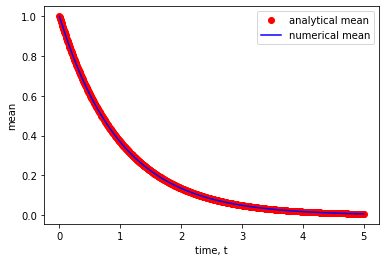

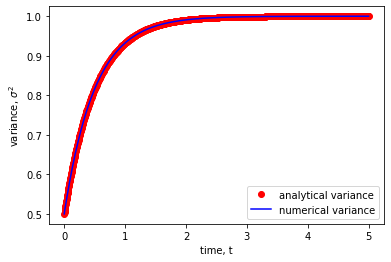

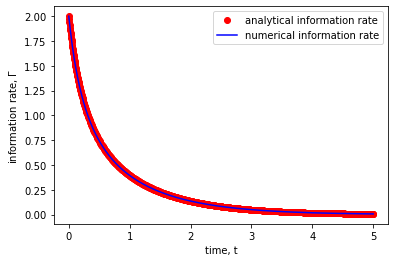

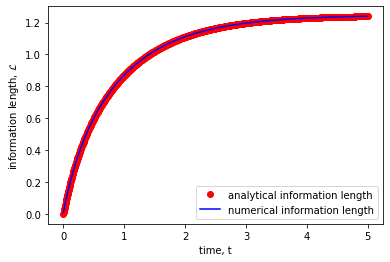

In [20]:
def mean1(x0, g, i):
    return x0*np.exp(-g*i)

def var1(g, b0, D, i):
    return (np.exp(-2*g*i))/(2*b0) + (D*(1-np.exp(-2*g*i)))/(g)

#calculation for mean
mean_data=[]
for i in t:
    mean11 = mean1(x0, g, i)
    mean_data.append(mean11)

#calculation for variance
var_data=[]
for i in t:
    var11 = var1(g, b0, D, i)
    var_data.append(var11)
    
#calculation for information rate
rate_data = []
#[information rate] calculation. [variance] and [mean] functions are used. 
for i in t:
    dif_std2 = D/np.sqrt(var1(g, b0, D, i)) - g*np.sqrt(var1(g, b0, D, i))
    dif_mean2 = -g*mean1(x0, g, i)
    info_rate11 = np.sqrt((2*dif_std2**2 + dif_mean2**2)/(var1(g, b0, D, i)))
    rate_data.append(info_rate11)
    
#calculation for information length
length_data = []
for i in t:
    length = quad(lambda i: np.sqrt((2*(D/np.sqrt(var1(g, b0, D, i)) - g*np.sqrt(var1(g, b0, D, i)))**2 + (-g*mean1(x0, g, i))**2)/(var1(g, b0, D, i))), 0, i)
    length_data.append(length[0])

plt.plot(t, mean_data, 'ro', label='analytical mean')
plt.plot(t, m, 'b', label='numerical mean')
plt.ylabel('mean')
plt.xlabel('time, t')
plt.legend(loc='best')
plt.show()

plt.plot(t, var_data, 'ro', label='analytical variance')
plt.plot(t, va, 'b', label='numerical variance')
plt.ylabel('variance, $\sigma^2$')
plt.xlabel('time, t')
plt.legend(loc='best')
plt.show()

plt.plot(t, rate_data, 'ro', label='analytical information rate')
plt.plot(t, r, 'b', label='numerical information rate')
plt.ylabel('information rate, $\Gamma$')
plt.xlabel('time, t')
plt.legend(loc='best')
plt.show()

plt.plot(t, length_data, 'ro', label='analytical information length')
plt.plot(t[0:len(t)-1], l, 'b', label='numerical information length')
plt.ylabel('information length, $\mathcal{L}$')
plt.xlabel('time, t')
plt.legend(loc='best')
plt.show()